# 1. ELM Pure

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import random
from model import ELM

In [2]:
# Network Settings
num_classes = 10
num_hidden_layers = 512
input_length = 28**2

In [3]:
# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Process images into input vectors
# each mnist image is a 28x28 picture with value ranges between 0 and 255
x_train = x_train.astype(np.float32) / 255.
x_train = x_train.reshape(-1, input_length)
x_test = x_test.astype(np.float32) / 255.
x_test = x_test.reshape(-1, input_length)

# converts [1,2] into [[0,1,0], [0,0,1]]
y_train = to_categorical(y_train, num_classes).astype(np.float32)
y_test = to_categorical(y_test, num_classes).astype(np.float32)

In [4]:
# create instance of our model
model = ELM(
    input_length,
    num_hidden_layers,
    num_classes
)

Bias shape: (512,)
W shape: (784, 512)
Beta shape: (512, 10)


In [5]:
# Train
model.fit(x_train, y_train, display_time=True)
train_loss, train_acc = model.evaluate(x_train, y_train)
print('train loss: %f' % train_loss)
print('train acc: %f' % train_acc)

Train time: 5.902353286743164
Fit Beta shape: (512, 10)
train loss: 0.014648
train acc: 0.911300


In [6]:
# Validation
val_loss, val_acc = model.evaluate(x_test, y_test)
print('val loss: %f' % val_loss)
print('val acc: %f' % val_acc)

val loss: 0.014451
val acc: 0.916700


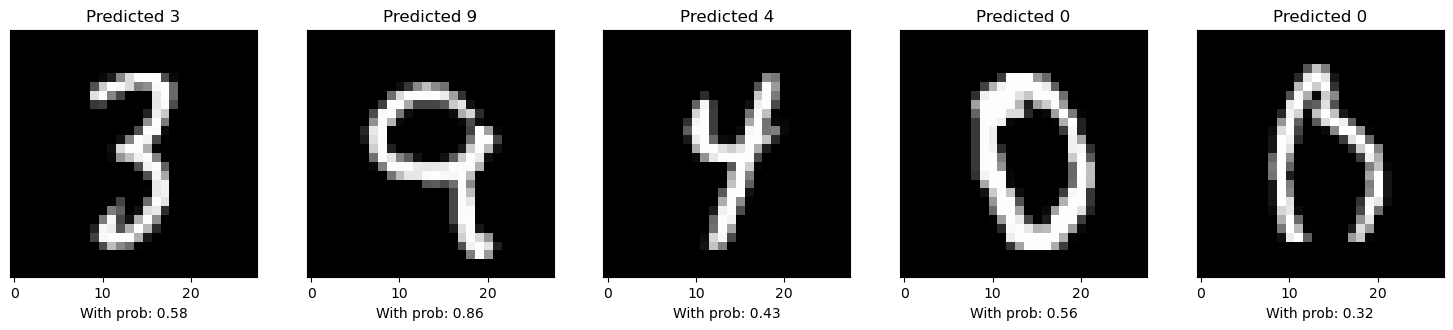

In [7]:
# Predictions
test_data = x_test[np.random.choice(len(x_test), size=5, replace=False)]
predictions = model(test_data)

fig, axs = plt.subplots(1, 5)
fig.set_size_inches(18.5, 10.5)
for idx, image in enumerate(test_data):
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    axs[idx].imshow(pixels, cmap='gray')
    axs[idx].axes.get_yaxis().set_visible(False)
    axs[idx].title.set_text(f'Predicted {np.argmax(predictions[idx])}')
    axs[idx].set_xlabel(f'With prob: {str(round(np.max(predictions[idx]), 2))}')
    
    
plt.show()

# 2. ELM Test

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

from model import ELM

In [9]:
def main():
    num_classes = 10
    num_hidden_layers = 1024
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Process images into input vectors
    # each mnist image is a 28x28 picture with value ranges between 0 and 255
    x_train = x_train.astype(np.float32) / 255.
    x_train = x_train.reshape(-1, 28 ** 2)
    x_test = x_test.astype(np.float32) / 255.
    x_test = x_test.reshape(-1, 28 ** 2)

    # converts [1,2] into [[0,1,0], [0,0,1]]
    y_train = to_categorical(y_train, num_classes).astype(np.float32)
    y_test = to_categorical(y_test, num_classes).astype(np.float32)

    # create instance of our model
    model = ELM(
        28 ** 2, #number of features
        num_hidden_layers,
        num_classes
    )

    # Train
    model.fit(x_train, y_train)
    train_loss, train_acc = model.evaluate(x_train, y_train)
    print('train loss: %f' % train_loss)
    print('train acc: %f' % train_acc)

    # Validation
    val_loss, val_acc = model.evaluate(x_test, y_test)
    print('val loss: %f' % val_loss)
    print('val acc: %f' % val_acc)

In [10]:
if __name__ == '__main__':
    main()

Bias shape: (1024,)
W shape: (784, 1024)
Beta shape: (1024, 10)
Fit Beta shape: (1024, 10)
train loss: 0.011540
train acc: 0.938233
val loss: 0.011581
val acc: 0.935100


In [12]:
28 ** 2

784

In [13]:
x_train.shape

(60000, 784)

In [11]:
np.zeros(shape=(4,))

array([0., 0., 0., 0.])